# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [23]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [25]:
df_data = pd.read_csv('./data/NLSY97_subset.csv')[['EARNINGS','S', 'EXP']]

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [26]:
df_data.shape

(2000, 3)

In [27]:
df_data.columns

Index(['EARNINGS', 'S', 'EXP'], dtype='object')

In [28]:
df_data.isna().values.any()

False

In [29]:
df_data.duplicated().sum()

514

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [30]:
df_data = df_data.drop_duplicates()

## Descriptive Statistics

In [31]:
df_data.describe()

,EARNINGS,S,EXP
count,"1,486.00","1,486.00","1,486.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.66
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features

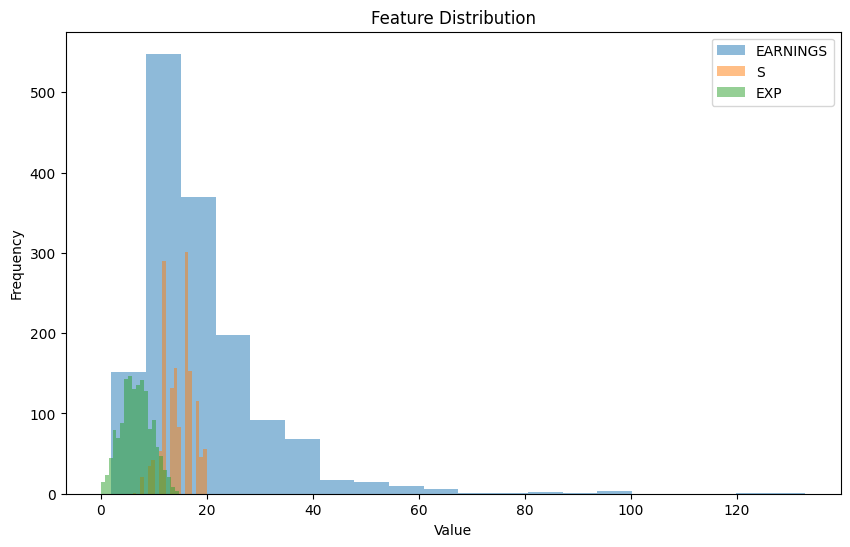

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_data['EARNINGS'], bins=20, alpha=0.5, label='EARNINGS')
plt.hist(df_data['S'], bins=20, alpha=0.5, label='S')
plt.hist(df_data['EXP'], bins=20, alpha=0.5, label='EXP')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Feature Distribution')
plt.legend()
plt.show()

<Figure size 2400x800 with 0 Axes>

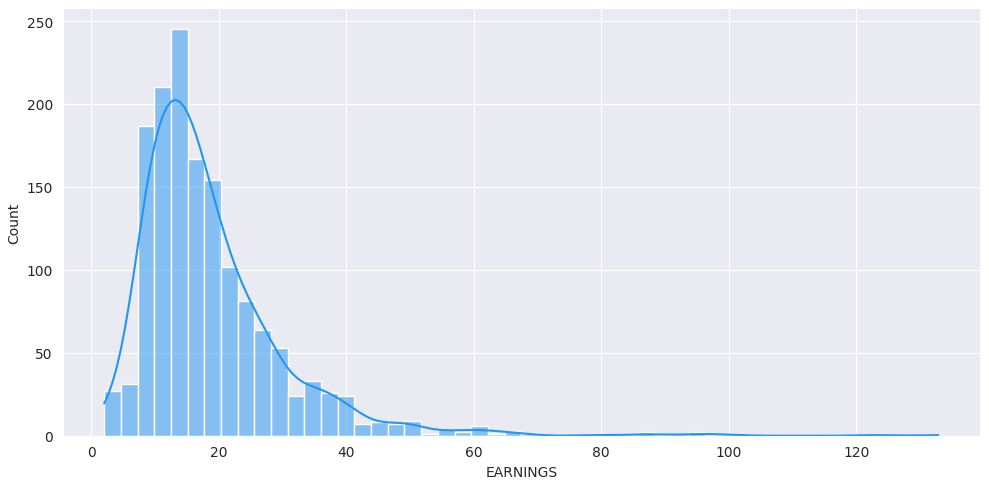

<Figure size 2400x800 with 0 Axes>

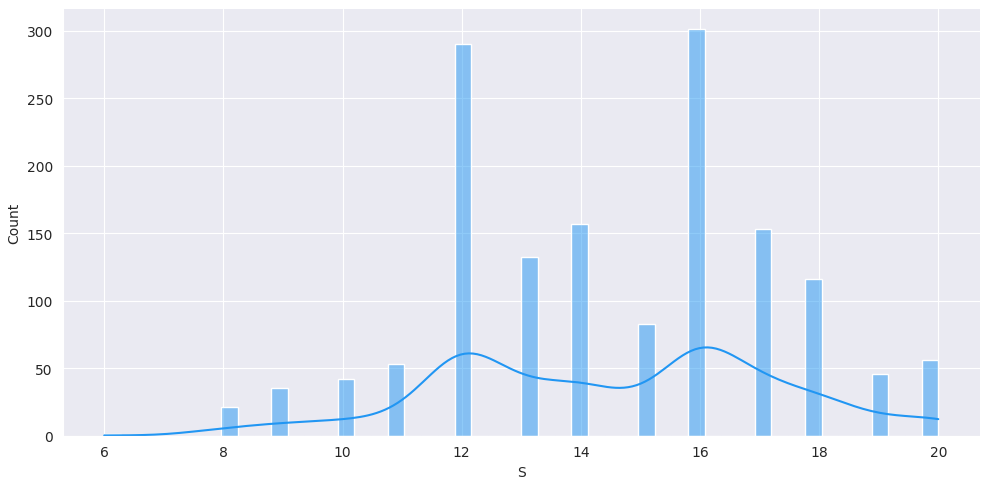

<Figure size 2400x800 with 0 Axes>

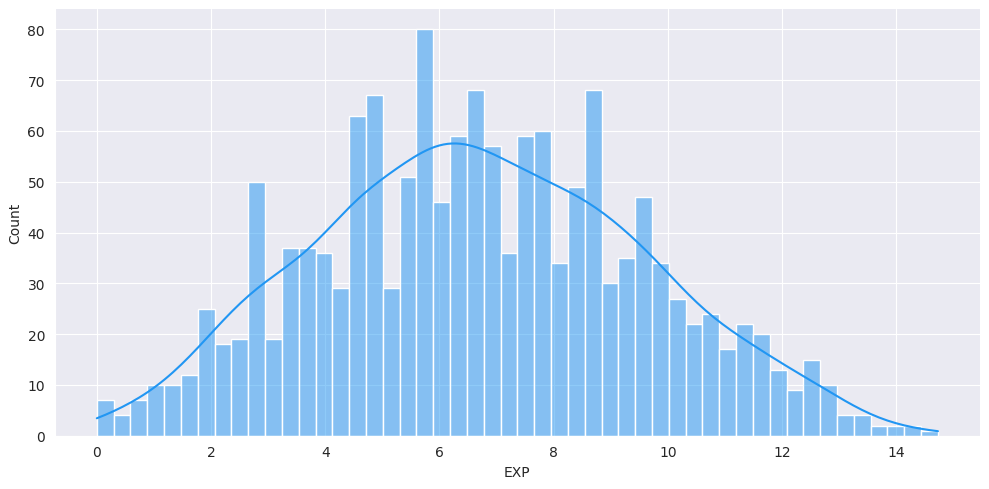

In [33]:
for column in df_data.columns.values:
    plt.figure(figsize=(12, 4), dpi=200)
    with sns.axes_style("darkgrid"):
        sns.displot(data=df_data, x=column, aspect=2, kde=True, color='#2196f3', bins=50)
    plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_data[['S', 'EXP']], 
                                                    df_data['EARNINGS'], 
                                                    test_size=0.2, 
                                                    random_state=69)

In [35]:
train_pct = 100*len(X_train)/len(df_data[['S', 'EXP']])
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/df_data[['S', 'EXP']].shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.9% of the total data.
Test data makes up the remaining 20.1%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [36]:
regressor = LinearRegression()
regressor.fit(X_train[['S']], y_train)
r_squared_train = regressor.score(X_train[['S']], y_train)

print("R-squared (training):", r_squared_train)

R-squared (training): 0.07448044464673498


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [37]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
coefficients = regression.coef_

In [39]:
intercept = coefficients[0]
slope = coefficients[1]

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")

Intercept: 1.77
Slope: 0.96


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [40]:
y_train_pred = regression.predict(X_train)
residuals = y_train - y_train_pred
residuals

112    -6.81
658    14.66
501    -6.54
1535    2.32
696    -0.67
        ... 
404    -9.06
439    -2.66
619    12.91
1411   -5.94
1133   13.70
Name: EARNINGS, Length: 1188, dtype: float64

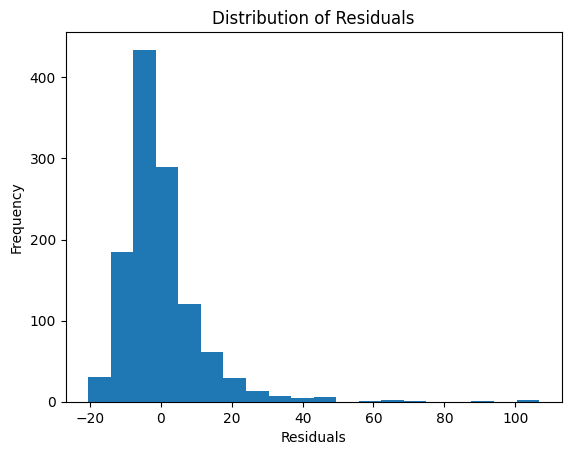

In [41]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [42]:
df_data = df_data.dropna(axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS'], axis=1), 
                                                    df_data.EARNINGS, 
                                                    test_size=0.2, 
                                                    random_state=69)

In [44]:
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.11


### Evaluate the Coefficients of the Model

In [45]:
coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
coef

,Coefficient
S,1.77
EXP,0.96


### Analyse the Estimated Values & Regression Residuals

In [46]:
y_train_pred = regr.predict(X_train)

In [47]:
residuals = y_train - y_train_pred

In [48]:
estimated_values = pd.DataFrame({'Actual Earnings': y_train, 'Estimated Earnings': y_train_pred, 'Residuals': residuals})
print(estimated_values.head())

      Actual Earnings  Estimated Earnings  Residuals
112             15.63               22.44      -6.81
658             31.95               17.29      14.66
501              7.65               14.19      -6.54
1535            12.50               10.18       2.32
696             12.50               13.17      -0.67


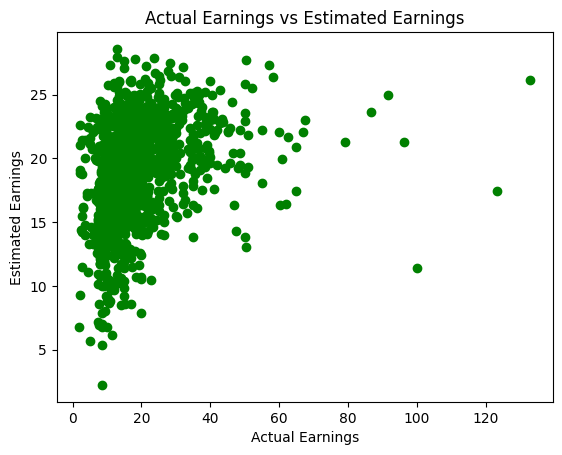

In [49]:
plt.scatter(y_train, y_train_pred, color='green')
plt.xlabel('Actual Earnings')
plt.ylabel('Estimated Earnings')
plt.title('Actual Earnings vs Estimated Earnings')
plt.show()

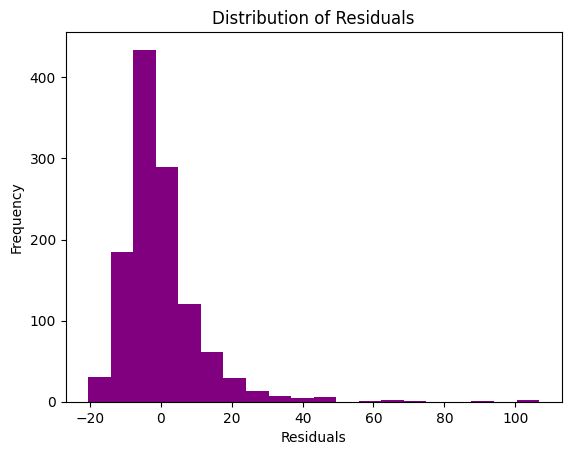

In [59]:
plt.hist(residuals, bins=20, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

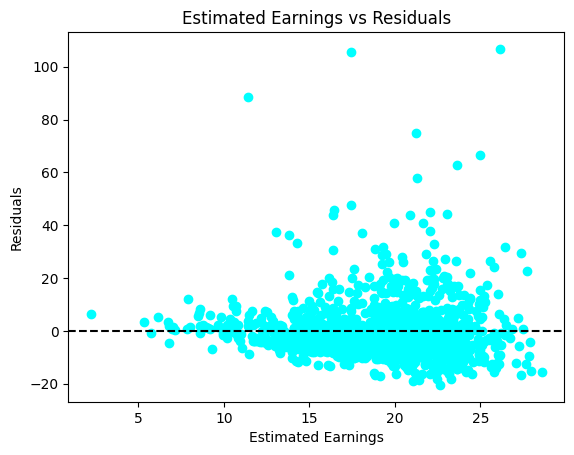

In [58]:
plt.scatter(y_train_pred, residuals,color='cyan')
plt.xlabel('Estimated Earnings')
plt.ylabel('Residuals')
plt.title('Estimated Earnings vs Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [52]:
schooling_year = 16
work_experience = 5

In [53]:
new_df = pd.DataFrame(columns=['S', 'EXP'], data=[['16', '5']])
prediction_bscw = regr.predict(new_df)[0]
print(f"A person with schooling of: {schooling_year} years\nWork experience of: {work_experience} years\nPredicted to have earnings of ${prediction_bscw:.2f} per hour")

A person with schooling of: 16 years
Work experience of: 5 years
Predicted to have earnings of $19.86 per hour


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

# Family
I would consider getting family situation and their history and then family integrity(to see how a bad/good family effects the offspring).

# Interests/Achievements
If someone is interested/achieved in some field and doesn't get a job in the same field whats their earning compared to those who didn't have such interests/achievements.

# Grade
Is there any advantage to be an overachiever or not.And how does that affect your earning(if by any).